
## GAN Training

- Generate a Mini Batch from Generator using Noise-Prior (Ground Truth - 0)
- Select a Mini Batch form Real Training Data (Ground Truth - 1)
- Train only Discriminator on both batches separately

  - Consider Generator as Frozen
- Train Generator using random noise as input and 1 as ground truth for all examples

   - Consider Discriminator as Frozen

### Training Tricks
- Normalize inputs between [-1,1] and use tanh as activation for generator
- Noise should be sampled from Gaussian Distribution
-Avoid Sparse Gradients

  - Prefer Leaky ReLU
  - Prefer Strided Convolutions instead of max pooling
  - Use Adam for optimization
  - One Sided Label Smoothing - Use 0 and 0.9 instead of 0 and 1 for discriminator


### Working on MNIST Dataset

In [2]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential,Model
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [3]:
!mkdir images
!mkdir model

In [4]:
(X_Train,_),(_,_) = mnist.load_data()
print(X_Train.shape)

(60000, 28, 28)


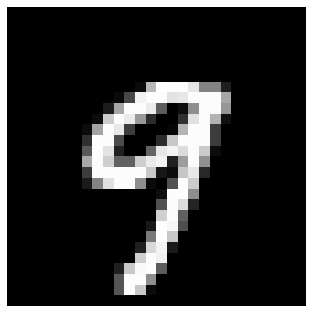

In [5]:
plt.imshow(X_Train[45],cmap='gray')
plt.axis('off')
plt.show()

#### Data Normalization

In [6]:
X_Train = (X_Train.astype('float32')-127.5)/127.5
print(np.min(X_Train))
print(np.max(X_Train))
X_Train = X_Train.reshape((-1,784))
print(X_Train.shape)

-1.0
1.0
(60000, 784)


In [7]:
TOTAL_EPOCHS = 50
BATCH_SIZE = 256
NO_OF_BATCHES = int(X_Train.shape[0]/BATCH_SIZE)
HALF_BATCH = 128
NOISE_DIM = 100
ADAM = Adam(lr=2e-4,beta_1=0.5)

#### Generator
- Input : Noise (100 Dim)
- Output : Vector (784 Dim)

In [8]:
generator = Sequential()
generator.add(Dense(256,input_shape=(NOISE_DIM,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation='tanh'))
generator.compile(loss='binary_crossentropy',optimizer=ADAM)
generator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)              

#### Discriminator

In [10]:
discriminator = Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer=ADAM)
discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


### GAN

In [11]:
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)
# Functional API
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=ADAM)

### Visualize

In [14]:
def save_imgs(epoch,samples=100):
  noise = np.random.normal(0,1,size=(samples,NOISE_DIM))
  generated_imgs = generator.predict(noise)
  generated_imgs = generated_imgs.reshape(samples,28,28)
  plt.figure(figsize=(10,10))
  for i in range(samples):
    plt.subplot(10,10,i+1)
    plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
    plt.axis('off')
  plt.tight_layout()
  plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
  plt.show()

### Training

/home/amit/.local/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch : 1, Discriminator Loss : 0.6436, Generator Loss : 0.9759
Epoch : 2, Discriminator Loss : 0.6222, Generator Loss : 1.1112
Epoch : 3, Discriminator Loss : 0.6261, Generator Loss : 1.1405
Epoch : 4, Discriminator Loss : 0.6173, Generator Loss : 1.1841
Epoch : 5, Discriminator Loss : 0.5919, Generator Loss : 1.2792


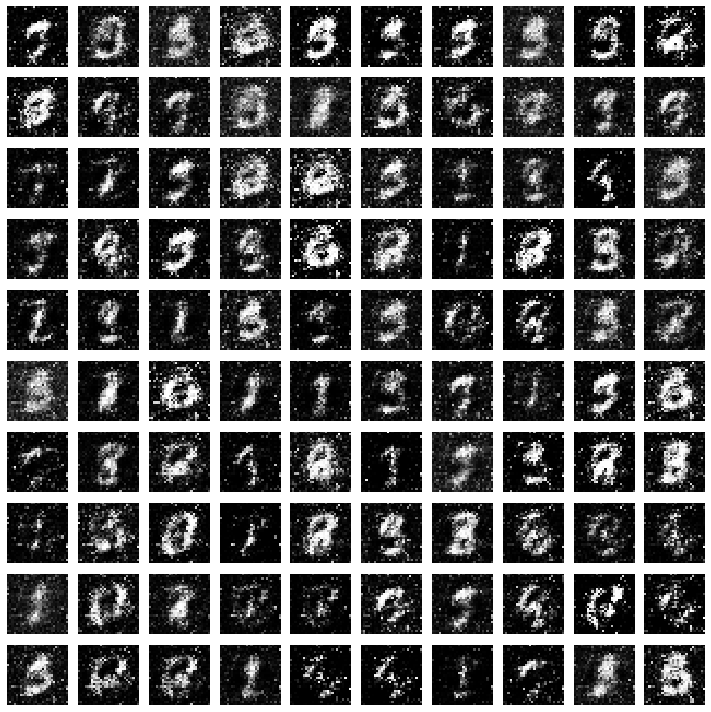

Epoch : 6, Discriminator Loss : 0.5676, Generator Loss : 1.3381
Epoch : 7, Discriminator Loss : 0.5526, Generator Loss : 1.3876
Epoch : 8, Discriminator Loss : 0.5492, Generator Loss : 1.4041
Epoch : 9, Discriminator Loss : 0.5620, Generator Loss : 1.3371
Epoch : 10, Discriminator Loss : 0.6107, Generator Loss : 1.1911


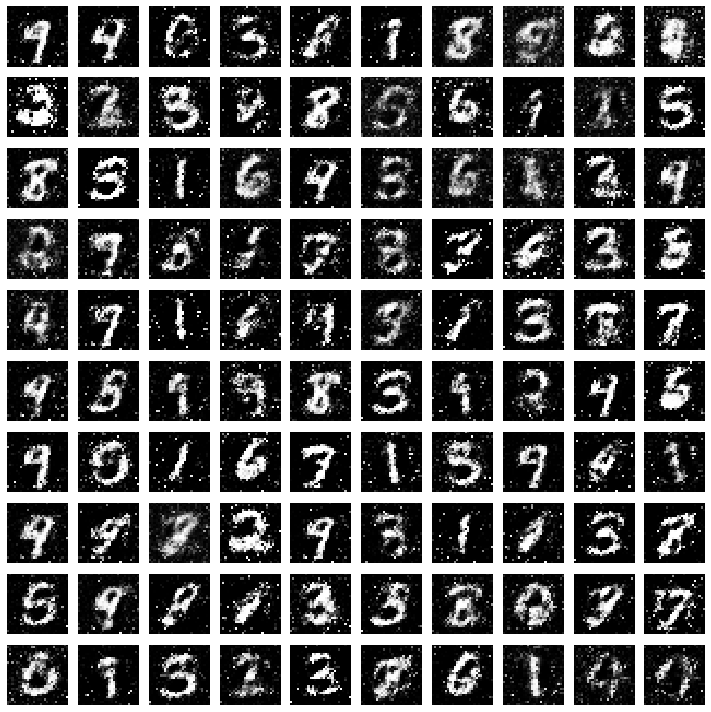

Epoch : 11, Discriminator Loss : 0.6414, Generator Loss : 1.0652
Epoch : 12, Discriminator Loss : 0.6349, Generator Loss : 1.0648
Epoch : 13, Discriminator Loss : 0.6315, Generator Loss : 1.0771
Epoch : 14, Discriminator Loss : 0.6364, Generator Loss : 1.0732
Epoch : 15, Discriminator Loss : 0.6339, Generator Loss : 1.0688


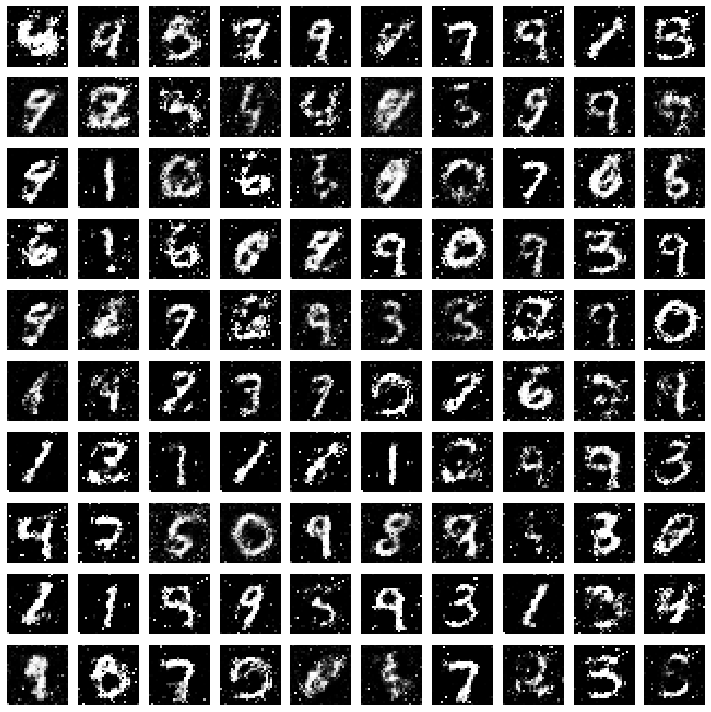

Epoch : 16, Discriminator Loss : 0.6421, Generator Loss : 1.0454
Epoch : 17, Discriminator Loss : 0.6419, Generator Loss : 1.0430
Epoch : 18, Discriminator Loss : 0.6411, Generator Loss : 1.0505
Epoch : 19, Discriminator Loss : 0.6400, Generator Loss : 1.0428
Epoch : 20, Discriminator Loss : 0.6387, Generator Loss : 1.0628


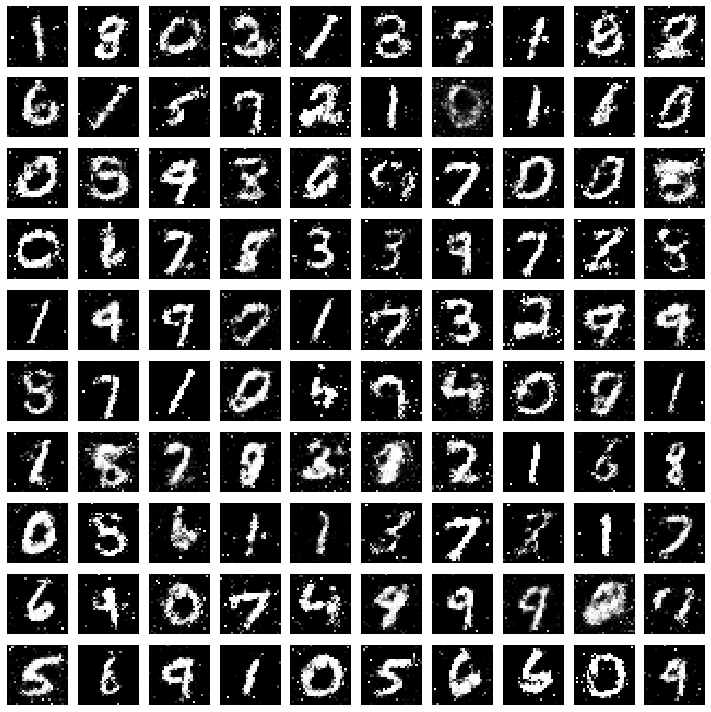

Epoch : 21, Discriminator Loss : 0.6425, Generator Loss : 1.0487
Epoch : 22, Discriminator Loss : 0.6412, Generator Loss : 1.0497
Epoch : 23, Discriminator Loss : 0.6446, Generator Loss : 1.0437
Epoch : 24, Discriminator Loss : 0.6443, Generator Loss : 1.0487
Epoch : 25, Discriminator Loss : 0.6444, Generator Loss : 1.0428


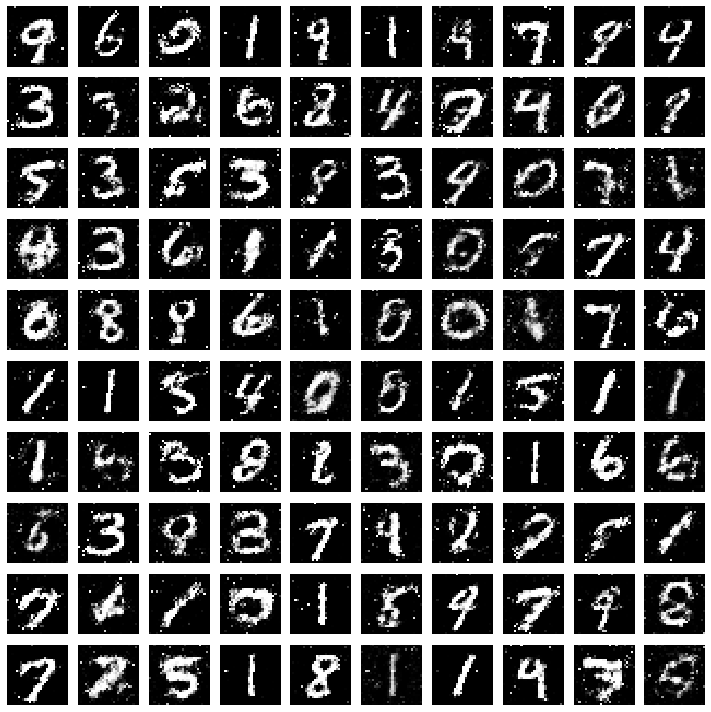

Epoch : 26, Discriminator Loss : 0.6458, Generator Loss : 1.0431
Epoch : 27, Discriminator Loss : 0.6469, Generator Loss : 1.0373
Epoch : 28, Discriminator Loss : 0.6509, Generator Loss : 1.0327
Epoch : 29, Discriminator Loss : 0.6511, Generator Loss : 1.0322
Epoch : 30, Discriminator Loss : 0.6528, Generator Loss : 1.0243


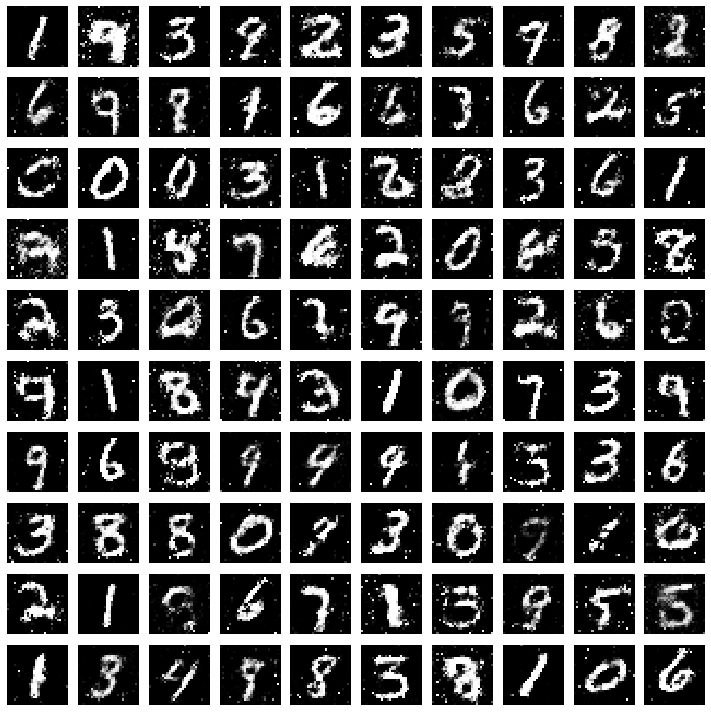

Epoch : 31, Discriminator Loss : 0.6508, Generator Loss : 1.0239
Epoch : 32, Discriminator Loss : 0.6533, Generator Loss : 1.0238
Epoch : 33, Discriminator Loss : 0.6536, Generator Loss : 1.0248
Epoch : 34, Discriminator Loss : 0.6554, Generator Loss : 1.0197
Epoch : 35, Discriminator Loss : 0.6570, Generator Loss : 1.0180


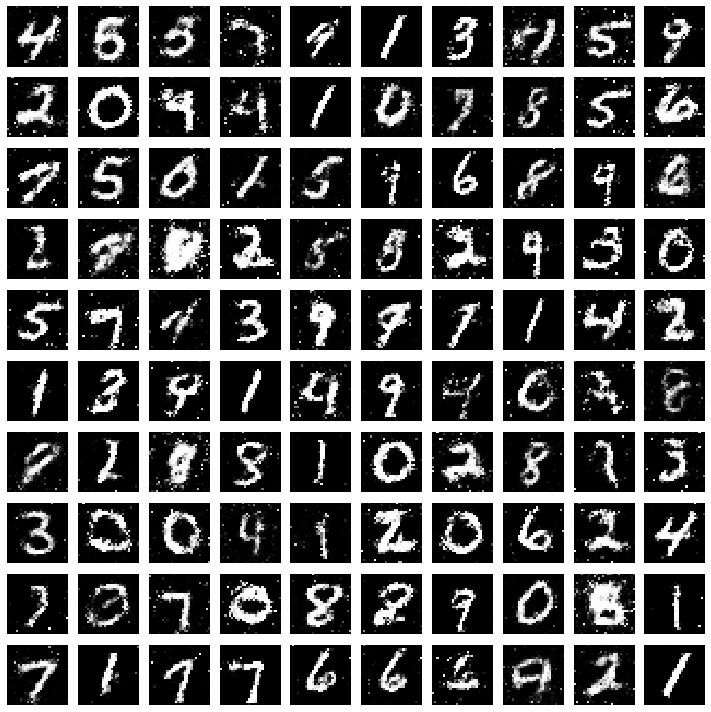

Epoch : 36, Discriminator Loss : 0.6563, Generator Loss : 1.0182
Epoch : 37, Discriminator Loss : 0.6596, Generator Loss : 1.0190
Epoch : 38, Discriminator Loss : 0.6599, Generator Loss : 1.0112
Epoch : 39, Discriminator Loss : 0.6591, Generator Loss : 1.0111
Epoch : 40, Discriminator Loss : 0.6589, Generator Loss : 1.0166


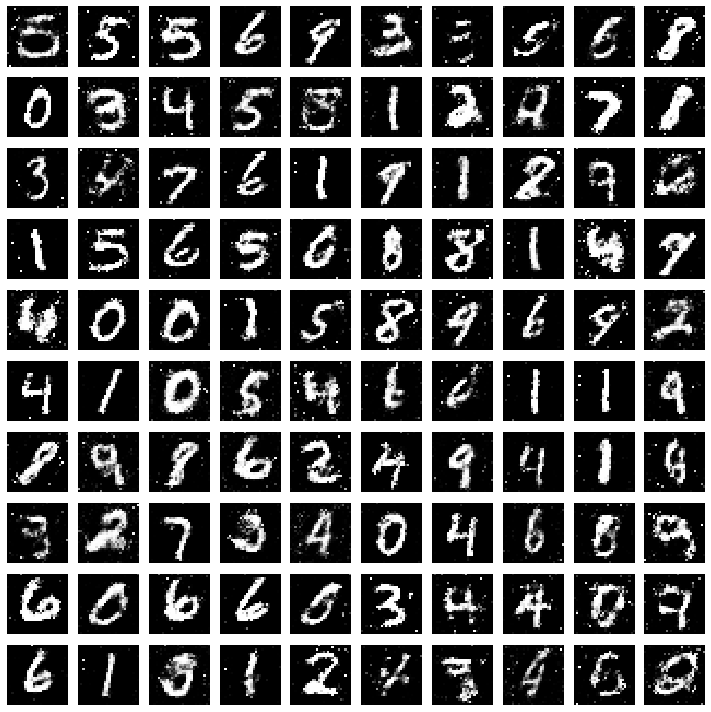

Epoch : 41, Discriminator Loss : 0.6605, Generator Loss : 1.0133
Epoch : 42, Discriminator Loss : 0.6589, Generator Loss : 1.0074
Epoch : 43, Discriminator Loss : 0.6606, Generator Loss : 1.0151
Epoch : 44, Discriminator Loss : 0.6603, Generator Loss : 1.0111
Epoch : 45, Discriminator Loss : 0.6621, Generator Loss : 1.0099


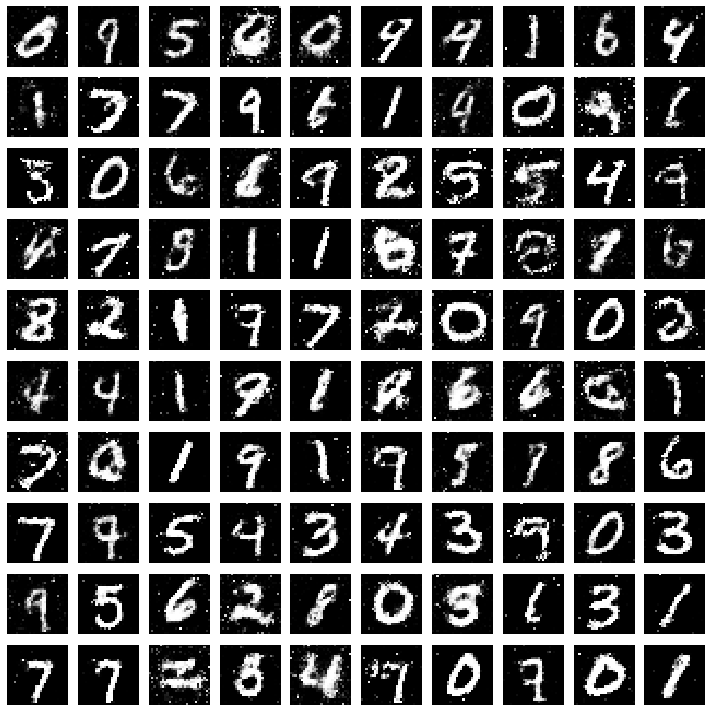

Epoch : 46, Discriminator Loss : 0.6610, Generator Loss : 1.0072
Epoch : 47, Discriminator Loss : 0.6607, Generator Loss : 1.0062
Epoch : 48, Discriminator Loss : 0.6622, Generator Loss : 1.0013
Epoch : 49, Discriminator Loss : 0.6621, Generator Loss : 1.0127
Epoch : 50, Discriminator Loss : 0.6621, Generator Loss : 1.0053


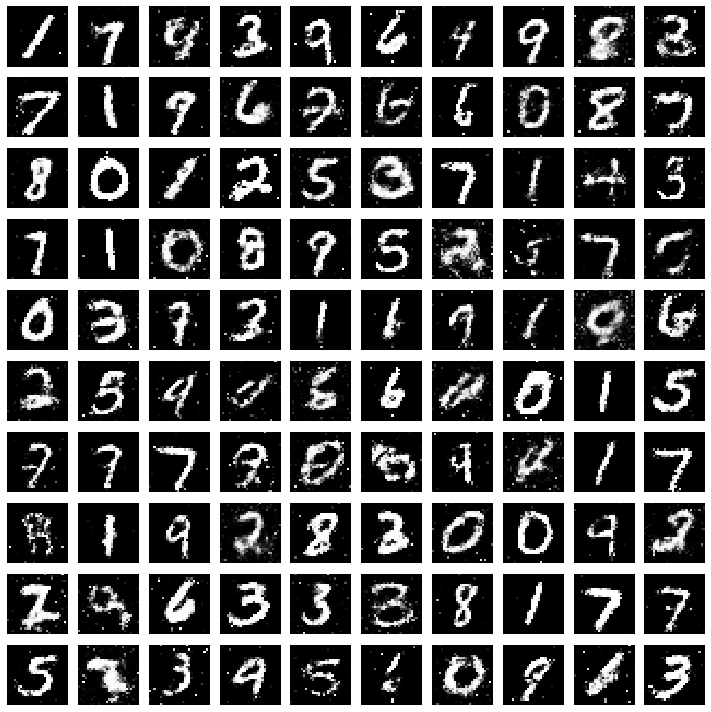

In [15]:
d_losses = []
g_losses = []
for epoch in range(TOTAL_EPOCHS):
  epoch_d_loss = 0.0
  epoch_g_loss = 0.0
  # Mini Batch Stochastic Gradient Descent
  for step in range(NO_OF_BATCHES):
    # For training Discriminator use 50% Real Data + 50% Fake Data
    # Real Data X
    idx = np.random.randint(0,X_Train.shape[0],HALF_BATCH)
    real_imgs = X_Train[idx]
    
    # Fake Data Y
    noise = np.random.normal(0,1,size=(HALF_BATCH,NOISE_DIM))
    fake_imgs = generator.predict(noise)
    
    # Labels
    real_y = np.ones((HALF_BATCH,1))*0.9 # One sided Label Smoothing
    fake_y = np.zeros((HALF_BATCH,1))

    # Training the Discriminator
    d_loss_real = discriminator.train_on_batch(real_imgs,real_y)
    d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y)
    d_loss = 0.5*d_loss_real + 0.5*d_loss_fake
    epoch_d_loss += d_loss

    # Training the Generator (Frozen Discriminator)
    noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
    ground_truth_y = np.ones((BATCH_SIZE,1))
    g_loss = model.train_on_batch(noise,ground_truth_y)
    epoch_g_loss += g_loss
    
  print('Epoch : %d, Discriminator Loss : %.4f, Generator Loss : %.4f'%(epoch+1,epoch_d_loss/NO_OF_BATCHES,epoch_g_loss/NO_OF_BATCHES))
  d_losses.append(epoch_d_loss/NO_OF_BATCHES)
  g_losses.append(epoch_g_loss/NO_OF_BATCHES)
  if (epoch+1)%5==0:
   generator.save('model/gan_generator_{0}.hf'.format(epoch+1))
   save_imgs(epoch)

In [27]:
!ls

images	model  sample_data


In [28]:
!zip -r /content/images.zip /content/images

  adding: content/images/ (stored 0%)
  adding: content/images/gan_output_epoch_20.png (deflated 5%)
  adding: content/images/gan_output_epoch_5.png (deflated 4%)
  adding: content/images/gan_output_epoch_50.png (deflated 6%)
  adding: content/images/gan_output_epoch_40.png (deflated 6%)
  adding: content/images/gan_output_epoch_30.png (deflated 6%)
  adding: content/images/gan_output_epoch_25.png (deflated 6%)
  adding: content/images/gan_output_epoch_10.png (deflated 4%)
  adding: content/images/gan_output_epoch_45.png (deflated 6%)
  adding: content/images/gan_output_epoch_35.png (deflated 6%)
  adding: content/images/gan_output_epoch_15.png (deflated 5%)


In [0]:
from google.colab import files
files.download('images.zip')

### Plotting The Loss

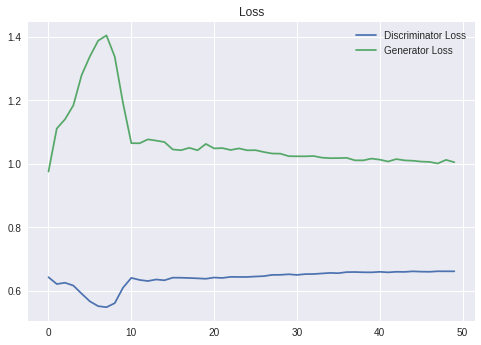

In [16]:
plt.plot(d_losses,label="Discriminator Loss")
plt.plot(g_losses,label="Generator Loss")
plt.legend()
plt.title('Loss')
plt.show()